In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics

### Preprocessing all the data

#### Preprocessing the train data

In [2]:
syscalls_snd_cert = open('syscalls/snd-cert/snd-cert.train')
syscalls_snd_unm = open('syscalls/snd-unm/snd-unm.train')

In [3]:
raw_train_data_cert = syscalls_snd_cert.read().split('\n')[:-1]
raw_train_data_unm = syscalls_snd_unm.read().split('\n')[:-1]

print(f'length raw cert train data: {len(raw_train_data_cert)}')
print(f'length raw unm train data: {len(raw_train_data_unm)}')


length raw cert train data: 811
length raw unm train data: 1030


We will pick r=min_length for the first test

In [4]:
n_cert = len(min(raw_train_data_cert, key=len)) 
print(f'n cert= {n_cert}')

n_unm = len(min(raw_train_data_unm, key=len)) 
print(f'n cert= {n_unm}')

n cert= 7
n cert= 7


In [9]:
def preprocess(raw_data, n):
    new_data = [] 
    seq_len = []
    for data in raw_data:
        nr_chuncks = len(data) // n 
        seq_len.append(nr_chuncks)
        temp = []
        for i in range(nr_chuncks):
            temp.append(data[i*n:i*n+n])
        new_data.append(temp)
    return new_data, seq_len

In [11]:
file_name = 'part2/preprocessed_cert.train'
file = open(file_name, "w")

new_data_cert,_ = preprocess(raw_train_data_cert, n_cert)

for row in new_data_cert:
    for d in row:
        file.write(d)
        file.write('\n')
file.close()

file_name = 'part2/preprocessed_unm.train'
file = open(file_name, "w")

new_data_unm,_ = preprocess(raw_train_data_unm, n_unm)

for row in new_data_unm:
    for d in row:
        file.write(d)
        file.write('\n')
file.close()

#### preprocessing the test data

In [13]:
#loading cert labels
raw_test_data_cert = open('syscalls/snd-cert/snd-cert-total.test')
labels_cert = open('syscalls/snd-cert/snd-cert-total.labels')

raw_test_data_cert = raw_test_data_cert.read().split('\n')[:-1]
labels_cert = labels_cert.read().split('\n')[:-1]
labels_cert = [int(a) for a in labels_cert]

print(f'length raw test data cert: {len(raw_test_data_cert)}')
print(f'length labels cert: {len(labels_cert)}')

#loading unm labels
raw_test_data_unm = open('syscalls/snd-unm/snd-unm-total.test')
labels_unm = open('syscalls/snd-unm/snd-unm-total.labels')

raw_test_data_unm = raw_test_data_unm.read().split('\n')[:-1]
labels_unm = labels_unm.read().split('\n')[:-1]
labels_unm = [int(a) for a in labels_unm]

print(f'length raw test data unm: {len(raw_test_data_unm)}')
print(f'length labels unm: {len(labels_unm)}')

length raw test data cert: 1700
length labels cert: 1700
length raw test data unm: 1700
length labels unm: 1700


In [18]:
# pre_test_data, seq_len = preprocess(raw_test_data)
# print(f'length preprocessed data: {len(pre_test_data)}')
# print(f'length of sequence: {len(seq_len)}')

length preprocessed data: 1700
length of sequence: 1700


In [19]:
def preprocess_scores(output, labels):
    #reading in all the scores and splitting on lines
    scores = output.read().split('\n')[:-1]
    output = []
    for r in scores: #adding all the scores that belong to one command together
        temp = []
        r = r.split(' ')[:-1]
        for c in r:
            temp.append(float(c))
        output.append(temp)
        
    #getting the mean score of every command
    means = [] 
    for o in output:
        means.append(np.mean(o))

    #creating the data that will be used for the analysis
    
    data = np.zeros((len(means),2))

    for i in range(len(data)):
        data[i][0] = means[i]
        data[i][1] = labels[i]
    
    data = sorted(data, key=lambda x: x[0])
    return np.asarray(data) 


In [20]:
def sen_spe(scores, norm1, norm2):
    """
    Function that returns the sensitivies and specitifities 
    """
    sensitivities = []
    r_specificities = []
    
    for ind, score in enumerate(scores):
        #below the cutoff points
        below = scores[:ind]
        #above the cutoff points
        above = scores[ind:]
        
        #calculating the true negatives
        
        tn_num = len([item for item in below if item[1] == 0])
        
        #calculating the true postives
        tp_num = len([item for item in above if item[1] == 1])

        sensitivities.append(tp_num / norm1)
        r_specificities.append(1 - tn_num / norm2)
        
    return sensitivities, r_specificities

### Part 2: analysis on snd-cert data

we now have all the mean of the scores and can start to calculate the AUC. 

### Experiments with r=1

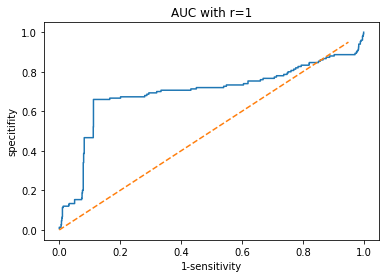

AUC: 0.6960602150537634


In [51]:
file = open('part2/snd-cert-r-1.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_cert), len(data)-sum(labels_cert))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=1")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

### test with r=2

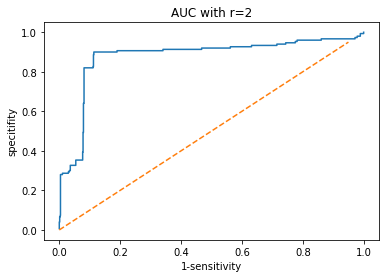

AUC: 0.8768043010752689


In [46]:
file = open('part2/snd-cert-r-2.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_cert), len(data)-sum(labels_cert))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=2")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

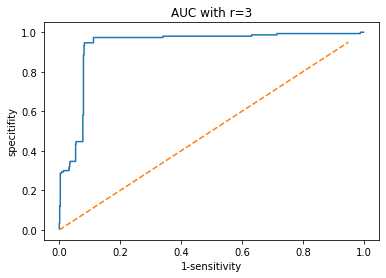

AUC: 0.9318881720430108


In [47]:
file = open('part2/snd-cert-r-3.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_cert), len(data)-sum(labels_cert))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=3")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

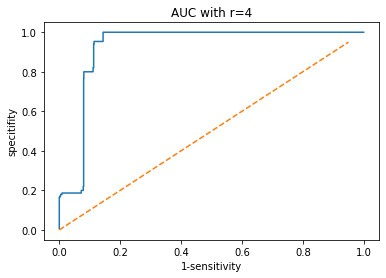

AUC: 0.9269247311827957


In [50]:
file = open('part2/snd-cert-r-4.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_cert), len(data)-sum(labels_cert))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=4")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

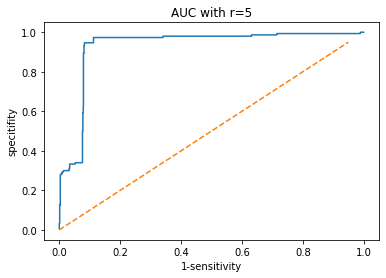

AUC: 0.9293333333333333


In [60]:
file = open('part2/snd-cert-r-5.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_cert), len(data)-sum(labels_cert))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=5")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

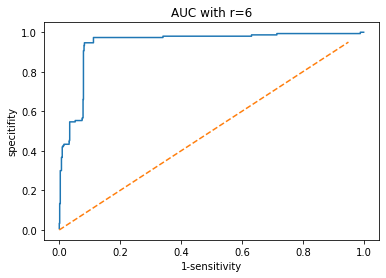

AUC: 0.9420043010752688


In [49]:
file = open('part2/snd-cert-r-6.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_cert), len(data)-sum(labels_cert))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=6")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

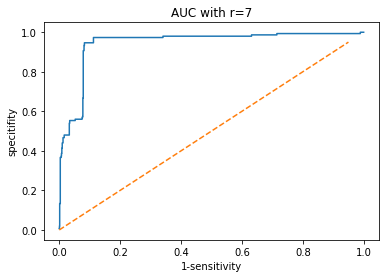

AUC: 0.9439268817204302


In [31]:
file = open('part2/snd-cert-r-7.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_cert), len(data)-sum(labels_cert))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=7")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

### Analysis on snd-unm

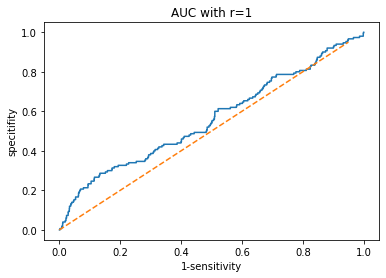

AUC: 0.5598623655913979


In [52]:
file = open('part2/snd-unm-r-1.output')
data = preprocess_scores(file, labels_unm)
sens, spec = sen_spe(data, sum(labels_unm), len(data)-sum(labels_unm))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=1")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

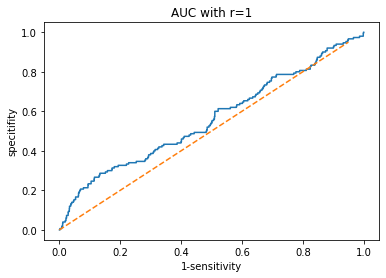

AUC: 0.5598623655913979


In [53]:
file = open('part2/snd-unm-r-1.output')
data = preprocess_scores(file, labels_unm)
sens, spec = sen_spe(data, sum(labels_unm), len(data)-sum(labels_unm))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=1")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

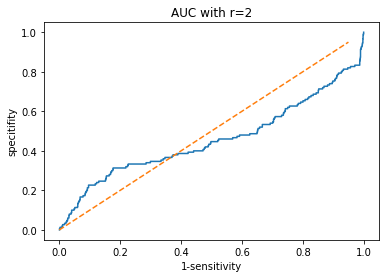

AUC: 0.4564043010752688


In [54]:
file = open('part2/snd-unm-r-2.output')
data = preprocess_scores(file, labels_unm)
sens, spec = sen_spe(data, sum(labels_unm), len(data)-sum(labels_unm))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=2")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

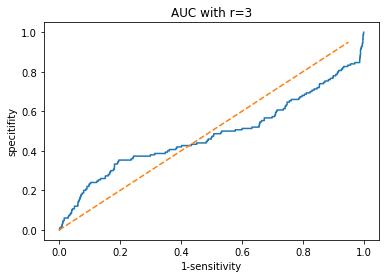

AUC: 0.48181075268817203


In [55]:
file = open('part2/snd-unm-r-3(2).output')
data = preprocess_scores(file, labels_unm)
sens, spec = sen_spe(data, sum(labels_unm), len(data)-sum(labels_unm))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=3")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

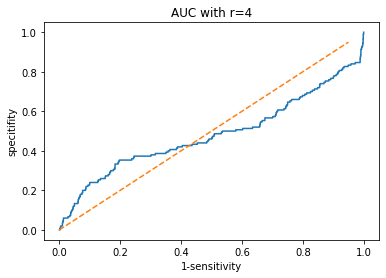

AUC: 0.48118279569892475


In [56]:
file = open('part2/snd-unm-r-4.output')
data = preprocess_scores(file, labels_unm)
sens, spec = sen_spe(data, sum(labels_unm), len(data)-sum(labels_unm))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=4")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

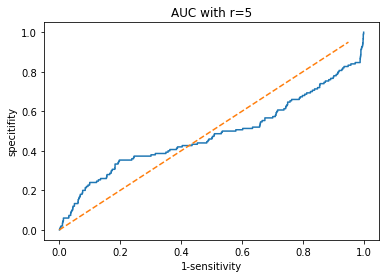

AUC: 0.4811741935483871


In [57]:
file = open('part2/snd-unm-r-5.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_unm), len(data)-sum(labels_unm))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=5")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

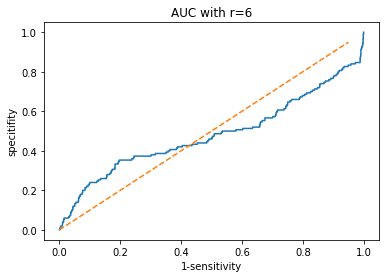

AUC: 0.4811655913978495


In [58]:
file = open('part2/snd-unm-r-6.output')
data = preprocess_scores(file, labels_cert)
sens, spec = sen_spe(data, sum(labels_unm), len(data)-sum(labels_unm))
plt.plot(spec,sens)
plt.plot(np.arange(0,1,0.05), np.arange(0,1,0.05), '--')
plt.title("AUC with r=6")
plt.xlabel('1-sensitivity')
plt.ylabel('specitifity')
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")